In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

In [2]:
df = pd.read_csv('aus-property.csv')

In [3]:
# display dataset
df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,18/09/2018,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3.0,unit,NSW1221,NSW180
1,24/09/2018,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3.0,unit,NSW1221,NSW180
2,26/09/2018,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2.0,unit,NSW1221,NSW180
3,26/09/2018,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3.0,unit,NSW1221,NSW180
4,2/10/2018,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3.0,unit,NSW1221,NSW180


In [4]:
df['bedrooms'].unique()

array([3., 2., 1., 0., 5., 4.])

In [5]:
# filer out those houses with number of bedroom is zero
df = df[df['bedrooms']!=0]
df['bedrooms'].unique()

array([3., 2., 1., 5., 4.])

In [6]:
# drop unescessary columns
df.drop(['loc_pid','lga_pid'],axis=1,inplace=True)
df['price'] = df['price'].fillna(df['price'].median())
df = df.dropna()

In [7]:
# split the dataset into different state 
sa = df[df['state']=='SA']
nsw = df[df['state']=='NSW']
vic = df[df['state']=='VIC']
wa = df[df['state']=='WA']
qld = df[df['state']=='QLD']
act = df[df['state']=='ACT']

In [8]:
# reset index
sa = sa.reset_index()
sa.drop('index',axis=1,inplace=True)

In [9]:
sa.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type
0,3/09/2018,1400000.0,Adelaide,Adelaide,SA,-34.930489,138.607457,3.0,unit
1,4/09/2018,325000.0,Adelaide,Adelaide,SA,-34.930876,138.607272,2.0,unit
2,5/09/2018,269950.0,Adelaide,Adelaide,SA,-34.932221,138.607355,1.0,unit
3,5/09/2018,650000.0,Adelaide,Adelaide,SA,-34.932886,138.611519,3.0,unit
4,7/09/2018,249000.0,Adelaide,Adelaide,SA,-34.924639,138.593676,3.0,unit


In [10]:
sa['city_name'].unique()

array(['Adelaide'], dtype=object)

In [11]:
# drop city_name because it does not provide any useful information
sa.drop('city_name',axis=1,inplace=True)

In [12]:
sa.head()

,date_sold,price,suburb,state,lat,lon,bedrooms,property_type
0,3/09/2018,1400000.0,Adelaide,SA,-34.930489,138.607457,3.0,unit
1,4/09/2018,325000.0,Adelaide,SA,-34.930876,138.607272,2.0,unit
2,5/09/2018,269950.0,Adelaide,SA,-34.932221,138.607355,1.0,unit
3,5/09/2018,650000.0,Adelaide,SA,-34.932886,138.611519,3.0,unit
4,7/09/2018,249000.0,Adelaide,SA,-34.924639,138.593676,3.0,unit


In [13]:
# format the date_sold to datetime format
# and split into year and month columns which are easlier for analysis
sa['date_sold'] = pd.to_datetime(sa['date_sold'])
sa['year'] = sa['date_sold'].dt.year
sa['month'] = sa['date_sold'].dt.month
sa.drop('date_sold',axis=1,inplace=True)

In [14]:
sa.head()

,price,suburb,state,lat,lon,bedrooms,property_type,year,month
0,1400000.0,Adelaide,SA,-34.930489,138.607457,3.0,unit,2018,3
1,325000.0,Adelaide,SA,-34.930876,138.607272,2.0,unit,2018,4
2,269950.0,Adelaide,SA,-34.932221,138.607355,1.0,unit,2018,5
3,650000.0,Adelaide,SA,-34.932886,138.611519,3.0,unit,2018,5
4,249000.0,Adelaide,SA,-34.924639,138.593676,3.0,unit,2018,7


In [15]:
# change suburb all to upper case
sa['suburb'] = sa['suburb'].apply(lambda x:x.upper())

In [16]:
# import suburb postcode file and save to dataframe
postcode = pd.read_excel('Suburbs.xlsx')
postcode.columns = ['postcode','suburb']
new =sa.copy()

In [17]:
# join two dataframe
sa1 = pd.merge(new, postcode, on='suburb')

In [18]:
# create year columns for selling price in different suburbs
sa1['2018'] = sa1[sa1['year']==2018]['price']
sa1['2019'] = sa1[sa1['year']==2019]['price']
sa1['2020'] = sa1[sa1['year']==2020]['price']

In [19]:
sa1.head(10)

,price,suburb,state,lat,lon,bedrooms,property_type,year,month,postcode,2018,2019,2020
0,1400000.0,ADELAIDE,SA,-34.930489,138.607457,3.0,unit,2018,3,5000,1400000.0,NaN,NaN
1,325000.0,ADELAIDE,SA,-34.930876,138.607272,2.0,unit,2018,4,5000,325000.0,NaN,NaN
2,269950.0,ADELAIDE,SA,-34.932221,138.607355,1.0,unit,2018,5,5000,269950.0,NaN,NaN
3,650000.0,ADELAIDE,SA,-34.932886,138.611519,3.0,unit,2018,5,5000,650000.0,NaN,NaN
4,249000.0,ADELAIDE,SA,-34.924639,138.593676,3.0,unit,2018,7,5000,249000.0,NaN,NaN
5,650000.0,ADELAIDE,SA,-34.927152,138.610655,1.0,unit,2018,11,5000,650000.0,NaN,NaN
6,295200.0,ADELAIDE,SA,-34.924639,138.593676,1.0,unit,2018,12,5000,295200.0,NaN,NaN
7,650000.0,ADELAIDE,SA,-34.932161,138.603961,2.0,unit,2018,9,5000,650000.0,NaN,NaN
8,340000.0,ADELAIDE,SA,-34.921530,138.608694,2.0,unit,2018,9,5000,340000.0,NaN,NaN
9,310000.0,ADELAIDE,SA,-34.932296,138.599344,2.0,unit,2018,9,5000,310000.0,NaN,NaN


Text(0.5, 0, 'Number of Sold')

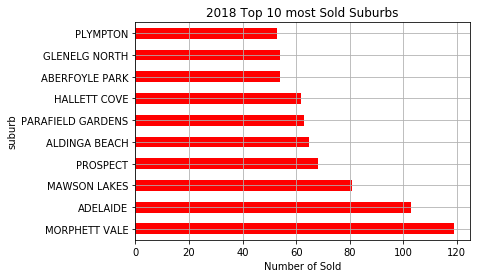

In [24]:
sa1[sa1['2018']!=0].groupby('suburb')['2018'].count().sort_values(ascending=False)[:10].plot(kind='barh',
                                                                                             color='r',
                                                                                            grid=True)
plt.title('2018 Top 10 most Sold Suburbs')
plt.xlabel('Number of Sold')

Text(0.5, 0, 'Number of Sold')

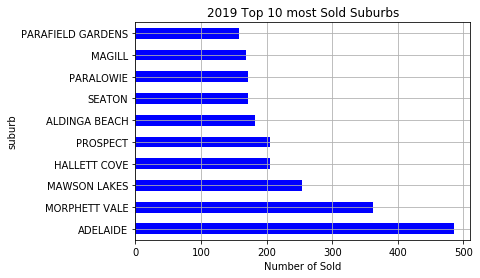

In [25]:
sa1[sa1['2019']!=0].groupby('suburb')['2019'].count().sort_values(ascending=False)[:10].plot(kind='barh',
                                                                                            color='b',
                                                                                            grid=True)
plt.title('2019 Top 10 most Sold Suburbs')
plt.xlabel('Number of Sold')

Text(0.5, 0, 'Number of Sold')

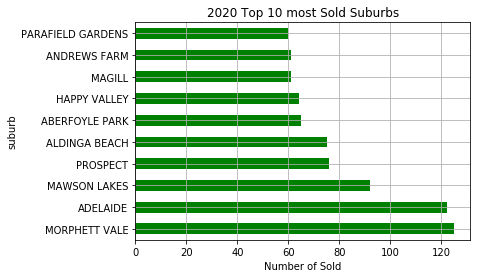

In [26]:
sa1[sa1['2020']!=0].groupby('suburb')['2020'].count().sort_values(ascending=False)[:10].plot(kind='barh',
                                                                                             color='g',
                                                                                            grid=True)
plt.title('2020 Top 10 most Sold Suburbs')
plt.xlabel('Number of Sold')

Text(0, 0.5, 'Property Type')

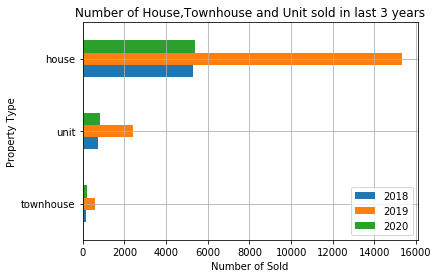

In [29]:
sa1.groupby('property_type')[['2018','2019','2020']].count().sort_values(by='2018').plot(kind='barh',
                                                                                        grid=True)
plt.title('Number of House,Townhouse and Unit sold in last 3 years')
plt.xlabel('Number of Sold')
plt.ylabel('Property Type')

Text(0.5, 0, 'Median Price')

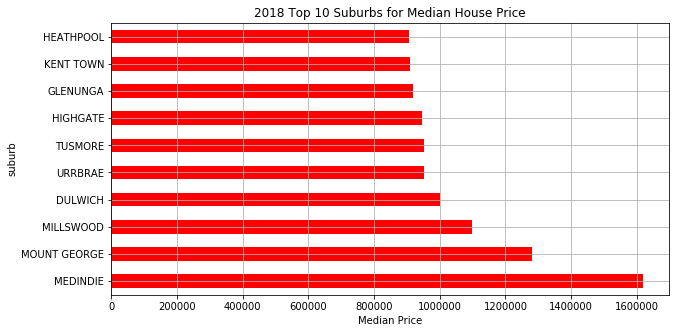

In [35]:
sa1.groupby('suburb')['2018'].median().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                  color='r',
                                                                                 figsize=(10,5),
                                                                                 grid=True)
plt.title('2018 Top 10 Suburbs for Median House Price')
plt.xlabel('Median Price')

Text(0.5, 0, 'Median Price')

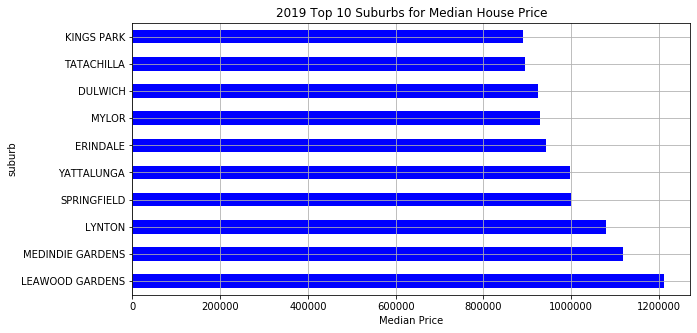

In [36]:
sa1.groupby('suburb')['2019'].median().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                  color='b',
                                                                                 figsize=(10,5),
                                                                                 grid=True)
plt.title('2019 Top 10 Suburbs for Median House Price')
plt.xlabel('Median Price')

Text(0.5, 0, 'Median Price')

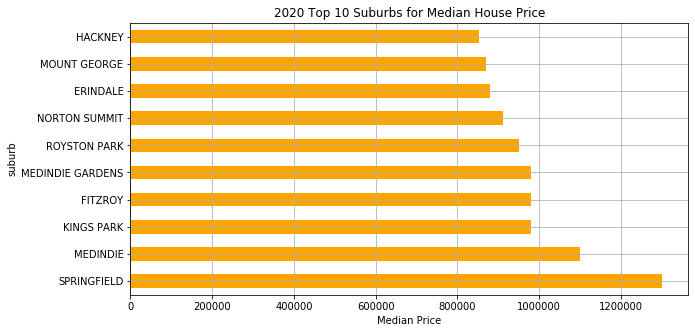

In [37]:
sa1.groupby('suburb')['2020'].median().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                  color='orange',
                                                                                 figsize=(10,5),
                                                                                 grid=True)
plt.title('2020 Top 10 Suburbs for Median House Price')
plt.xlabel('Median Price')

Text(0, 0.5, 'Property Type')

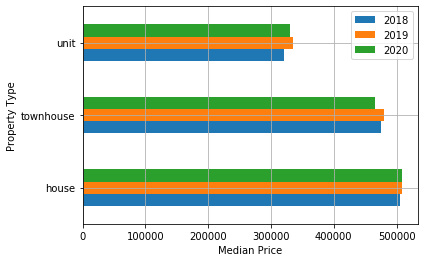

In [44]:
# compare median price for 3 types of house from 2018 to 2020
sa1.groupby('property_type').median()[['2018','2019','2020']].plot(kind='barh',grid=True)
plt.xlabel('Median Price')
plt.ylabel('Property Type')

Text(0, 0.5, 'Median Price')

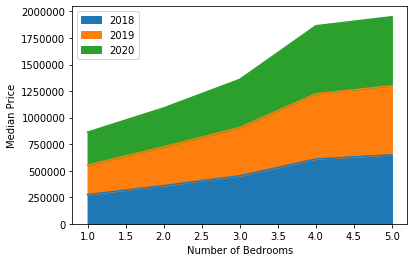

In [45]:
# median price trend for bedrooms
sa1.groupby('bedrooms').median()[['2018','2019','2020']].plot(kind='area')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price')

In [46]:
# create a pivot table (median house price) and reset the index
table = sa1.pivot_table(values='price',index='year',columns='suburb',aggfunc='median').T
table = table.reset_index()
table.head(20)

year,suburb,2018,2019,2020
0,ABERFOYLE PARK,420000.0,431150.0,425000.0
1,ADELAIDE,520000.0,544500.0,550277.5
2,ALBERT PARK,419250.0,467500.0,505500.0
3,ALBERTON,411500.0,440000.0,445000.0
4,ALDGATE,650000.0,660000.0,685000.0
5,ALDINGA,522500.0,650000.0,692500.0
6,ALDINGA BEACH,349000.0,370000.0,360000.0
7,ALLENBY GARDENS,662500.0,585000.0,650000.0
8,ANDREWS FARM,280000.0,283000.0,280000.0
9,ANGLE PARK,441250.0,400000.0,427500.0


In [47]:
# calculate and add a growth rate column
table['Annual Growth Rate 18-19 (%)'] = np.round(((table[2019]/table[2018])-1)*10,2)
table['Annual Growth Rate 19-20 (%)'] = np.round(((table[2020]/table[2019])-1)*10,2)

In [48]:
# top growth rate 2019 - 2020
table.sort_values(by='Annual Growth Rate 19-20 (%)',
                          ascending=False,
                         ignore_index=True)[['suburb','Annual Growth Rate 19-20 (%)']].head(10)

year,suburb,Annual Growth Rate 19-20 (%)
0,NEW PORT,13.64
1,DARLINGTON,8.95
2,DUDLEY PARK,7.24
3,MEDINDIE,6.92
4,EXETER,6.05
5,TUSMORE,6.05
6,FORRESTON,5.80
7,FITZROY,5.08
8,THOMPSON BEACH,4.28
9,CHARLESTON,4.21


In [49]:
# top growth rate 2018 - 2019
table.sort_values(by='Annual Growth Rate 18-19 (%)',
                          ascending=False,
                          ignore_index=True)[['suburb','Annual Growth Rate 18-19 (%)']].head(10)

year,suburb,Annual Growth Rate 18-19 (%)
0,HILLIER,28.81
1,LYNTON,7.28
2,MEDINDIE GARDENS,7.19
3,BLEWITT SPRINGS,6.58
4,EVERARD PARK,6.05
5,PAYNEHAM SOUTH,5.89
6,KANGARILLA,5.66
7,NOARLUNGA CENTRE,5.47
8,YATTALUNGA,5.35
9,WHITES VALLEY,4.77


In [50]:
# perform log transformation
sa2 = sa1.copy()
sa2.price = np.log(sa2.price)
sa2['2018'] = np.log(sa2['2018'])
sa2['2019'] = np.log(sa2['2019'])
sa2['2020'] = np.log(sa2['2020'])

Text(0.5, 1.0, 'Region by Postcode')

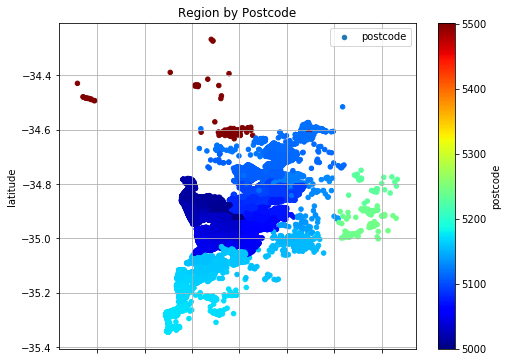

In [53]:
# visualise postcode based on longitude and latitude
sa2.plot(kind='scatter',x='lon',y='lat',c='postcode',label='postcode',cmap=plt.get_cmap('jet'),
        colorbar=True,figsize=(8,6),grid=True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Region by Postcode')

Text(0.5, 1.0, '2018 Property Price Heatmap')

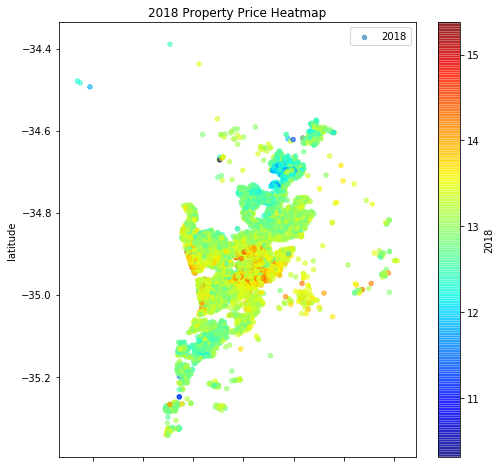

In [54]:
# price distribution on the map for 2018 (longitude and latitude)
sa2.plot(kind='scatter',x='lon',y='lat',c='2018',label='2018',cmap=plt.get_cmap('jet'),
        colorbar=True,alpha=0.6,figsize=(8,8))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('2018 Property Price Heatmap')

Text(0.5, 1.0, '2019 Property Price Heatmap')

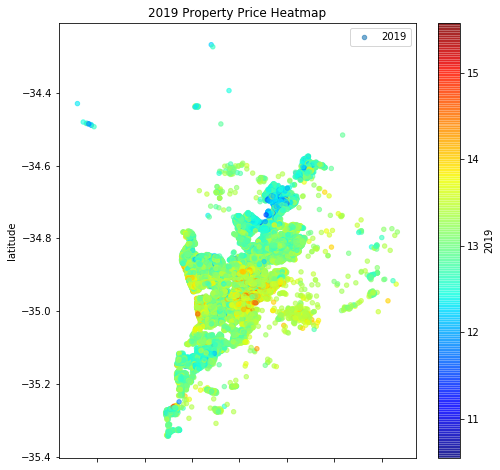

In [55]:
# price distribution on the map for 2019 (longitude and latitude)
sa2.plot(kind='scatter',x='lon',y='lat',c='2019',label='2019',cmap=plt.get_cmap('jet'),
        colorbar=True,alpha=0.6,figsize=(8,8))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('2019 Property Price Heatmap')

Text(0.5, 1.0, '2020 Property Price Heatmap')

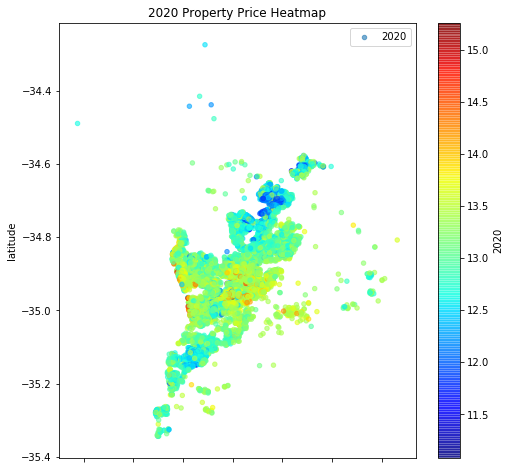

In [56]:
# price distribution on the map for 2020 (longitude and latitude)
sa2.plot(kind='scatter',x='lon',y='lat',c='2020',label='2020',cmap=plt.get_cmap('jet'),
        colorbar=True,alpha=0.6,figsize=(8,8))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('2020 Property Price Heatmap')

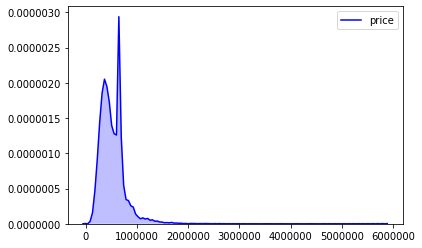

In [284]:
# view price distribution
sns.kdeplot(sa1['price'],color='b',shade=True,cbar=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002970A9248C8>,
      dtype=object)

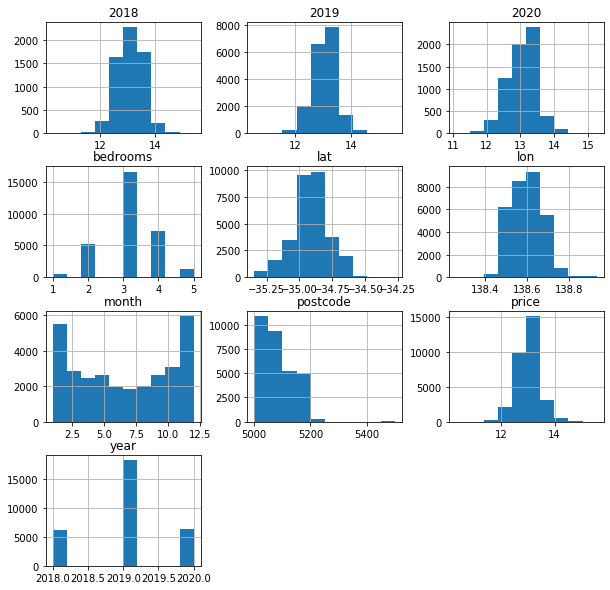

In [247]:
# view in histgram
sa2.hist(figsize=(10,10))

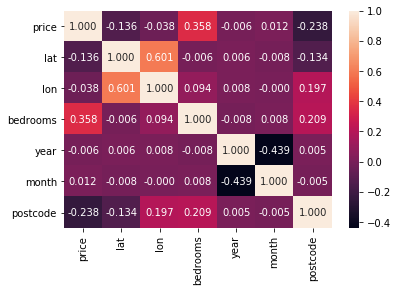

In [297]:
# corrlection visualization
sns.heatmap(sa1.drop(['2018','2019','2020'],axis=1).corr(),annot=True,fmt='.3f')